In [1]:
from google.colab import files
files.upload()  # Upload kaggle.json here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harikakatakam26","key":"911408d46f508712345e6a4f3c4dfd42"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#to download the datasets
!kaggle datasets download -d uciml/sms-spam-collection-dataset

Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 546MB/s]


In [4]:
!unzip sms-spam-collection-dataset.zip

Archive:  sms-spam-collection-dataset.zip
  inflating: spam.csv                


In [46]:
import pandas as pd

base_path = '/content/spam.csv'

if os.path.exists(base_path):
    df = pd.read_csv(base_path, encoding='latin-1')
    print("Number of rows:", len(df))
else:
    print("File does not exist.")

Number of rows: 5572


In [47]:
import pandas as pd
#import dataset

df=pd.read_csv('spam.csv',encoding='latin-1')[['v1','v2']]
df.columns=['label','text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score

df['label']=df['label'].map({'ham':0,'spam':1})

In [49]:
X_train,X_test,y_train,y_test=train_test_split(df['text'],df['label'],test_size=0.35,random_state=42)

In [50]:
vectorizer=TfidfVectorizer(stop_words='english')
X_train_tfidf=vectorizer.fit_transform(X_train)
X_test_tfidf=vectorizer.transform(X_test)

In [51]:
clf=MultinomialNB()
clf.fit(X_train_tfidf,y_train)

MultinomialNB()

accuracy: 0.9671963095848283
F1 score 0.8632478632478633
classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1685
           1       1.00      0.76      0.86       266

    accuracy                           0.97      1951
   macro avg       0.98      0.88      0.92      1951
weighted avg       0.97      0.97      0.97      1951



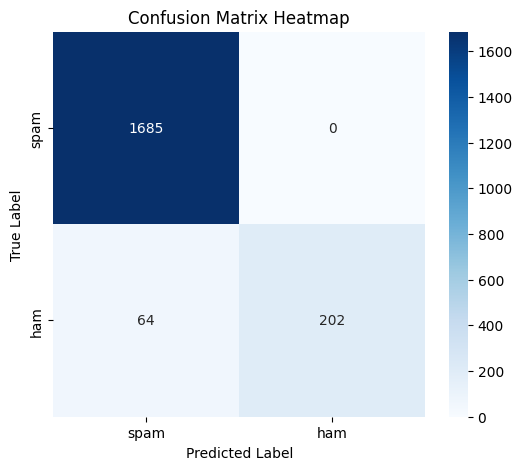

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

y_pred=clf.predict(X_test_tfidf)

print("accuracy:",accuracy_score(y_test,y_pred))
print("F1 score",f1_score(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))


cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['spam', 'ham'],
            yticklabels=['spam', 'ham'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [56]:
def pred_msg(msg):
  vec=vectorizer.transform([msg])
  pred=clf.predict(vec)[0]
  return 'spam' if pred==1 else 'ham'

#test_samples

SMS = input("Subject of the email: ")
print(pred_msg(SMS))


Subject of the email: meeting in 10 mins
ham
